In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
startups_df = pd.read_csv('50_Startups.csv')

In [3]:
startups_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


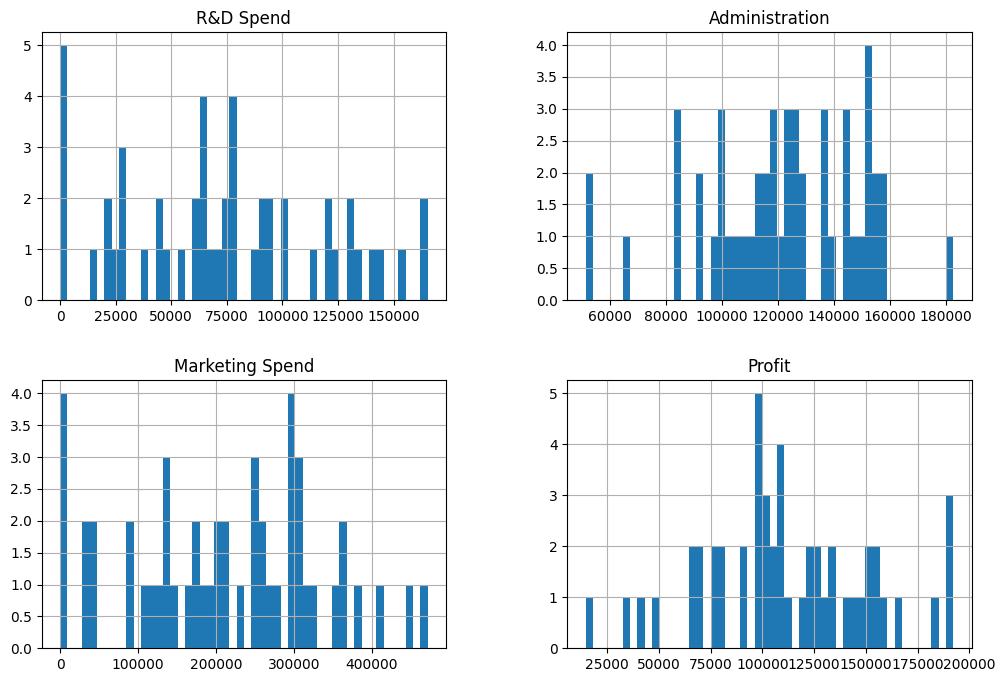

In [4]:
startups_df.hist(bins=50, figsize=(12,8))
plt.show()

In [5]:
startups_df.isna().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


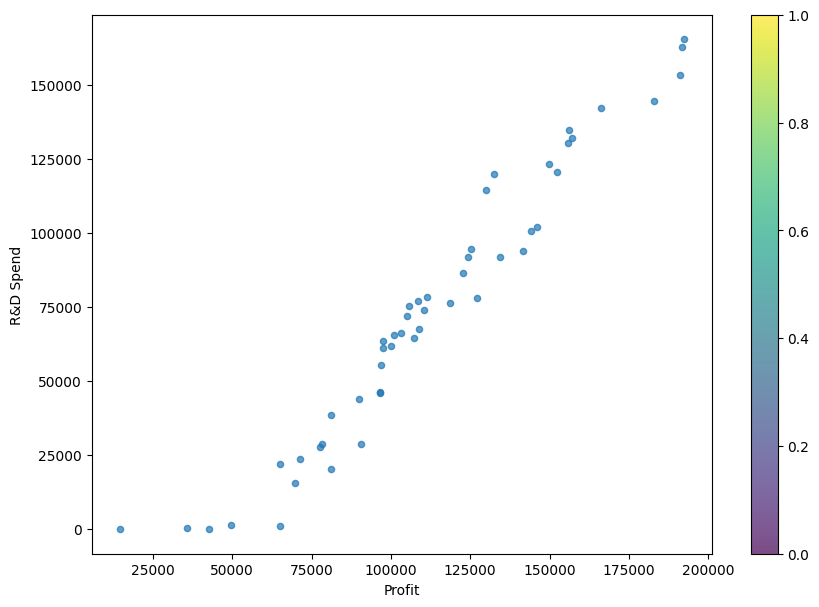

In [7]:
startups_df.plot(kind="scatter", x="Profit",y="R&D Spend", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7),alpha=0.7)
plt.show()

In [8]:
X = startups_df[["Profit"]]
y = startups_df["R&D Spend"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
lr = LinearRegression()
lr.fit(X_train.values,y_train)

LinearRegression()

In [11]:
y_pred = lr.predict(X_test)
r2_score( y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.9285556275150332

In [12]:
print(lr.intercept_)

-50588.05710387917


In [13]:
#checking the prediction
lr.predict(X[0:1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([162660.47627634])

In [14]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [15]:
import pickle
# save
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)
# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)
X[0:5]

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [16]:
clf2.predict(X[0:5])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([162660.47627634, 162139.42764424, 161316.79925382, 152278.94525339,
       133740.44154028])

In [17]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

      Actual     Predicted
13  91992.39  98379.865493
39  38558.51  39260.039709
30  61994.48  60258.409390
45   1000.23  21425.151853
17  94657.16  88467.352552


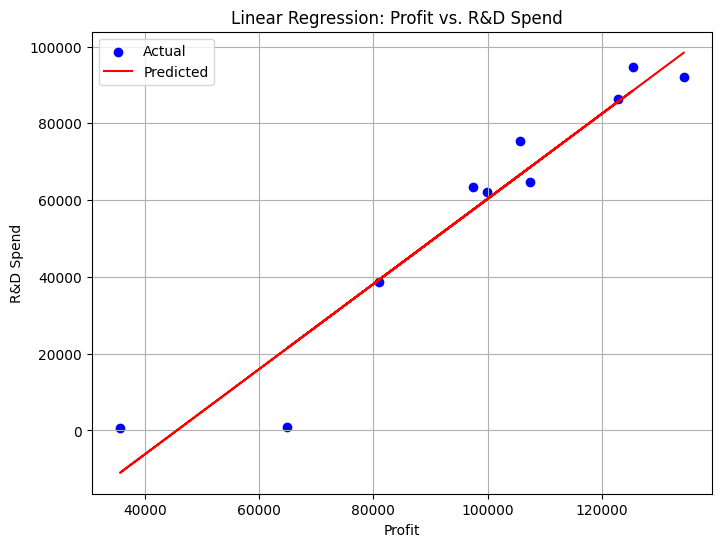

In [18]:
# Visualize the results (optional)
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Linear Regression: Profit vs. R&D Spend  ')
plt.xlabel('Profit')
plt.ylabel('R&D Spend')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
X = X.values
y = y.values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print("Shape of X:", X_train.shape)
print("Shape of y:", y_train.shape)

Shape of X: (40, 1)
Shape of y: (40,)


In [23]:
# =======================================
# Multiple Linear Regression
# =======================================
model_multiple = LinearRegression()

# Train the model
model_multiple.fit(X_train, y_train)

y_pred_multiple = model_multiple.predict(X_test)

mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("\nMultiple Linear Regression")
print(f"  Mean Squared Error: {mse_multiple:.4f}")
print(f"  R² Score: {r2_multiple:.4f}")


Multiple Linear Regression
  Mean Squared Error: 75909538.6588
  R² Score: 0.9286


In [24]:
print(model_multiple.intercept_)

-50588.05710387917


In [25]:
type(model_multiple)

sklearn.linear_model._base.LinearRegression

In [26]:
model_multiple.predict(X[0:5])

array([162660.47627634, 162139.42764424, 161316.79925382, 152278.94525339,
       133740.44154028])

In [27]:
import pandas as pd
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_multiple})
print(predictions.head())

     Actual     Predicted
0  91992.39  98379.865493
1  38558.51  39260.039709
2  61994.48  60258.409390
3   1000.23  21425.151853
4  94657.16  88467.352552
